In [2]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.21.2
matplotlib: 3.4.3
pandas: 1.3.3
sklearn: 1.0


In [3]:
# Load libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [4]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [5]:
# Authentication
consumerKey = 'a30vwjmZFWEkqpNDSj6SyRpRh'
consumerSecret = 'KCQEalLOFjfUk774OmJCXQLyRQHZ9cM6Q1YJHqjoGwj1ryvHgV'
accessToken = '1415692899098927105-0OZffFqzLXOzWrLlhQmOqMliNk13Fp'
accessTokenSecret = 'R3SA0vyTmZdBM5flbvop3dhloj5egalUdHZcwUvAFcRa3'
auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

#keyword ='#IPLWinner2021 -filter:retweets'
keyword=['RCBTweets','ChennaiIPL','DelhiCapitals','rajasthanroyals','SunRisers','PunjabKingsIPL','KKRiders'] 
#noOfTweet = 1000
total=[]
anal=[]
#keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = 100 
for i in range(0,len(keyword)):
 tweets = api.user_timeline(screen_name=keyword[i],tweet_mode='extended',count=noOfTweet)
 for tweet in tweets:
    total.append(tweet.full_text)
    analysis=TextBlob(tweet.full_text)
    anal.append(analysis.sentiment)
for i in range(0,len(keyword)):
 print(total[i*noOfTweet])
 print(anal[i*noOfTweet]) 
 print('\n')







When you realise it is Friday tomorrow. 😁

#PlayBold #WeAreChallengers #FridayMood #WeekendMood https://t.co/Tc3UzxkOie
Sentiment(polarity=0.0, subjectivity=0.0)


One Sleep Away...🥳

#CSKvKKR #WhistlePodu #Yellove 🦁💛 https://t.co/yqYZ9CCFOY
Sentiment(polarity=0.0, subjectivity=0.0)


.@RickyPonting sums up how special this team is 💙

#YehHaiNayiDilli #IPL2021 https://t.co/5QRsrAAyoM
Sentiment(polarity=0.35714285714285715, subjectivity=0.5714285714285714)


𝘼 𝙨𝙞𝙜𝙝𝙩 𝙛𝙤𝙧 𝙨𝙤𝙧𝙚 𝙚𝙮𝙚𝙨. 💗

#RoyalsFamily | @benstokes38 https://t.co/4OH0VJL4Cy
Sentiment(polarity=0.0, subjectivity=0.0)


#T20WC India Squad: Locked 🔒
#T20WC Indian support bowlers: Locked 🔒

Ready to bowl to the skipper, Umran? 

#TeamIndia #SRH #OrangeArmy #OrangeOrNothing https://t.co/IdqKYrXSLs
Sentiment(polarity=0.2, subjectivity=0.5)


#PBKS has a lot of game-changers already, but with the Mega Auctions coming next year, here’s Sassy Girl asking the people of Chandigarh who do they want to see don the red and gold! 🧐

#SaddaP

In [6]:
data=pd.DataFrame([i for i in total],columns=['Tweets'])
data


,Tweets
0,When you realise it is Friday tomorrow. 😁\n\n#...
1,Refreshing freshness in every sip for our chal...
2,Looking effortlessly cool with the new #RCBxPU...
3,Virat Kohli 🤝 Setting Records \n\nWe’ve loved ...
4,Setting the bar higher and higher with every #...
...,...
695,The vibes in the dressing room after the big w...
696,Whether you learn from your mistakes or from t...
697,"""I think our bowlers have actually shown us th..."
698,Shakib Al Hasan heaped praises on teammate #Su...


In [7]:
def cleanText(t):
    t=re.sub(r'@[\w]+','',t)#remove
    t=re.sub(r'#','',t)
    t=re.sub(r'[\n\t]','',t)
    t=re.sub(r'RT[\s]+','',t)
    t=re.sub(r'https?:\/\/\S+','',t)
    t=re.sub('[^\w\s]','',t)
    t=re.sub(r':','',t) 
    #t=t.str.lower()
    return t
data['Tweets']=data['Tweets'].apply(cleanText)
data['Tweets']=data['Tweets'].str.lower()
data    

,Tweets
0,when you realise it is friday tomorrow playbol...
1,refreshing freshness in every sip for our chal...
2,looking effortlessly cool with the new rcbxpum...
3,virat kohli setting records weve loved watchi...
4,setting the bar higher and higher with every i...
...,...
695,the vibes in the dressing room after the big w...
696,whether you learn from your mistakes or from t...
697,i think our bowlers have actually shown us the...
698,shakib al hasan heaped praises on teammate sun...


In [8]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['Tweets']=data['Tweets'].apply(remove_emoji)
data    

,Tweets
0,when you realise it is friday tomorrow playbol...
1,refreshing freshness in every sip for our chal...
2,looking effortlessly cool with the new rcbxpum...
3,virat kohli setting records weve loved watchi...
4,setting the bar higher and higher with every i...
...,...
695,the vibes in the dressing room after the big w...
696,whether you learn from your mistakes or from t...
697,i think our bowlers have actually shown us the...
698,shakib al hasan heaped praises on teammate sun...


In [9]:
'''from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in data['Tweets']:
  for i in word:  
    lexeme = nlp.vocab[i]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(token_list)
print(filtered_sentence)  
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
data'''

'from spacy.lang.en.stop_words import STOP_WORDS\n\n# Create list of word tokens after removing stopwords\nfiltered_sentence =[] \n\nfor word in data[\'Tweets\']:\n  for i in word:  \n    lexeme = nlp.vocab[i]\n    if lexeme.is_stop == False:\n        filtered_sentence.append(word) \nprint(token_list)\nprint(filtered_sentence)  \ndata[\'Tweets\'] = data[\'Tweets\'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))\ndata'

In [10]:
def getsubject(t):
   return TextBlob(t).sentiment.subjectivity
def getpolar(t):
   return TextBlob(t).sentiment.polarity
   
data['subjectivity']=data['Tweets'].apply(getsubject)   
data['polar']=data['Tweets'].apply(getpolar)   
data.head()

,Tweets,subjectivity,polar
0,when you realise it is friday tomorrow playbol...,0.000000,0.000000
1,refreshing freshness in every sip for our chal...,0.700000,0.050000
2,looking effortlessly cool with the new rcbxpum...,0.552273,0.243182
3,virat kohli setting records weve loved watchi...,0.507143,0.314286
4,setting the bar higher and higher with every i...,0.500000,0.250000


In [11]:
#postive,negatinve,neutral
def analysis(score):
    if(score>0): 
        return 'positive'
    elif(score<0): 
        return 'negative'
    else:
         return 'neutral'
data['result']=data['polar'].apply(analysis)
data.head()    


,Tweets,subjectivity,polar,result
0,when you realise it is friday tomorrow playbol...,0.000000,0.000000,neutral
1,refreshing freshness in every sip for our chal...,0.700000,0.050000,positive
2,looking effortlessly cool with the new rcbxpum...,0.552273,0.243182,positive
3,virat kohli setting records weve loved watchi...,0.507143,0.314286,positive
4,setting the bar higher and higher with every i...,0.500000,0.250000,positive


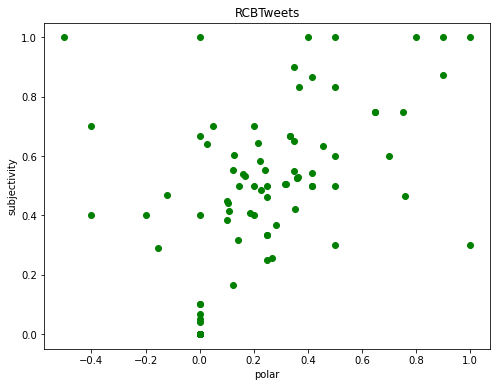

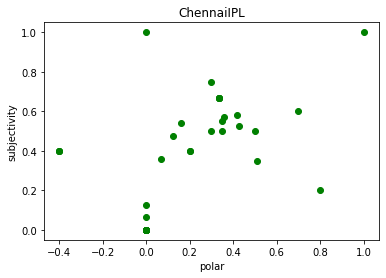

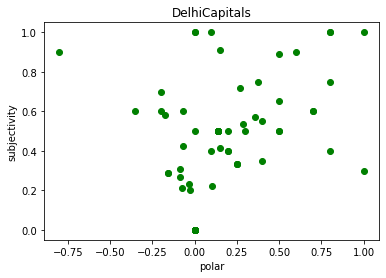

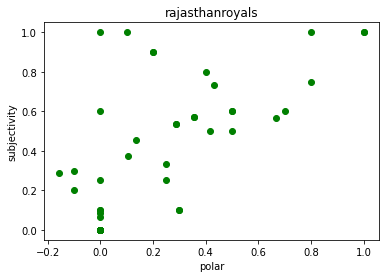

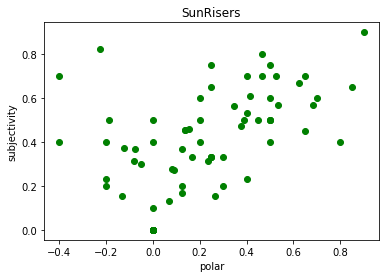

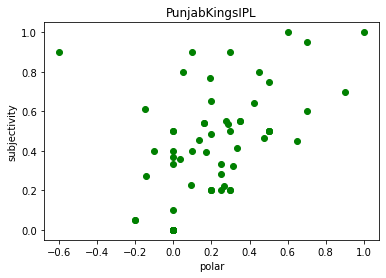

In [12]:
plt.figure(figsize=(8,6))
for i in range(0,(len(keyword)-1)*noOfTweet,noOfTweet):
    for j in range(i,i+noOfTweet):
     plt.scatter(data['polar'][j],data['subjectivity'][j],color='green')
    plt.title(keyword[int(i/noOfTweet)])
    plt.xlabel('polar')
    plt.ylabel('subjectivity')
    plt.show()    

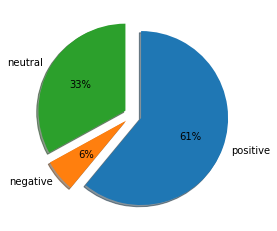

RCBTweets-postive 61.0

RCBTweets-negative 6.0

RCBTweets-nuetral 33.0



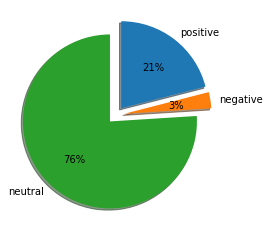

ChennaiIPL-postive 21.0

ChennaiIPL-negative 3.0

ChennaiIPL-nuetral 76.0



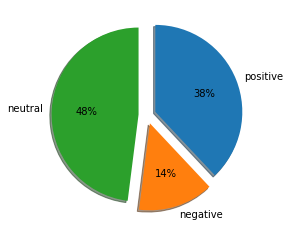

DelhiCapitals-postive 38.0

DelhiCapitals-negative 14.000000000000002

DelhiCapitals-nuetral 48.0



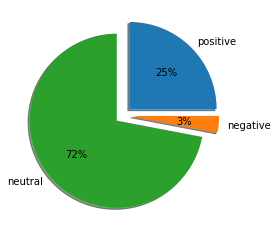

rajasthanroyals-postive 25.0

rajasthanroyals-negative 3.0

rajasthanroyals-nuetral 72.0



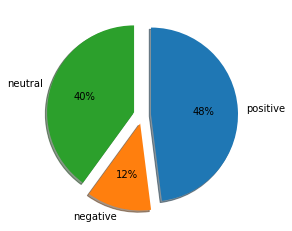

SunRisers-postive 48.0

SunRisers-negative 12.0

SunRisers-nuetral 40.0



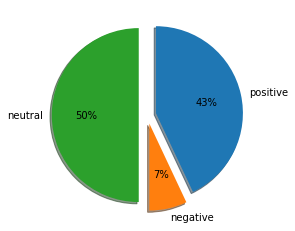

PunjabKingsIPL-postive 43.0

PunjabKingsIPL-negative 7.000000000000001

PunjabKingsIPL-nuetral 50.0



In [22]:
for i in range(0,(len(keyword)-1)*noOfTweet,noOfTweet):
    pos=0
    neg=0
    nue=0
    for j in range(i,i+noOfTweet):
        
        if(data['result'][j]=='positive'): 
           pos+=1
        elif(data['result'][j]=='negative'):
           neg+=1
        else:
          nue+=1  
    name = ['positive','negative','neutral']
    percent = [pos,neg,nue]
    plt.pie(percent, labels=name, counterclock=False ,explode = explode ,autopct='%0.f%%', shadow=True, startangle=90)   
    plt.show()    
    print(keyword[int(i/noOfTweet)]+ '-postive {}\n'.format(float(pos/noOfTweet)*100))
    print(keyword[int(i/noOfTweet)] +'-negative {}\n'.format(float(neg/noOfTweet)*100))
    print(keyword[int(i/noOfTweet)] +'-nuetral {}\n'.format(float(nue/noOfTweet)*100))


